<a href="https://colab.research.google.com/github/Rahul2661998/Old-cars-price-prediction-model/blob/main/Regression_Model_for_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set() 

In [ ]:
raw_data=pd.read_csv('/content/drive/MyDrive/Regression models/1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#Preprocessing

In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Variable 'Model' has too many unique values and we cannot make this many dummy variables therefore we would be droping 'Model' variable. 

In [ ]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
# Drop null values
data=data.dropna()
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Analysing feature distributions

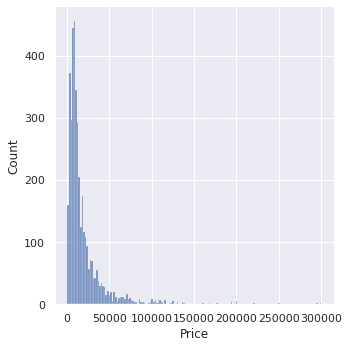

In [ ]:
sns.displot(data['Price']) # show exponential distribution 

In [ ]:
# removing outliers for Price
q=data['Price'].quantile(0.99)
data_1=data[data['Price']<q]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


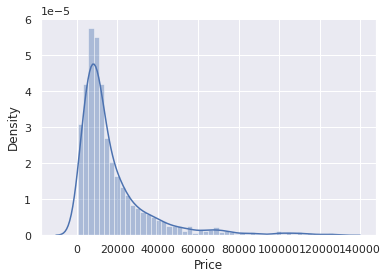

In [ ]:
sns.distplot(data_1['Price'])

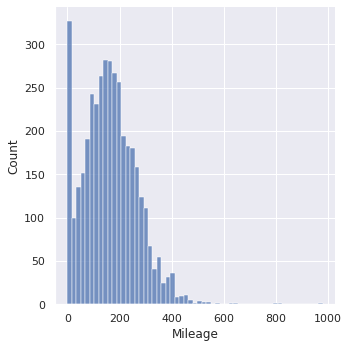

In [ ]:
# feature Mileage
sns.displot(data_1['Mileage'])

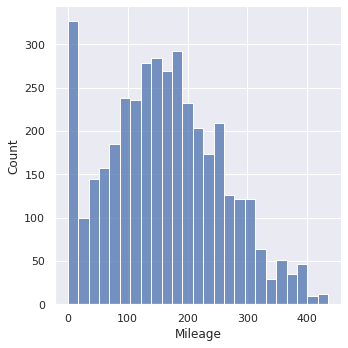

In [ ]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


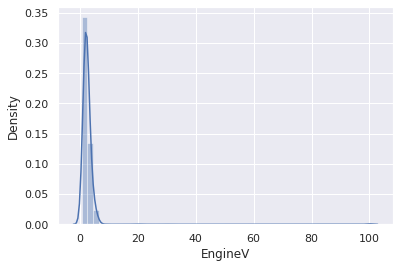

In [ ]:
#Feature Enginev
sns.distplot(data_2['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


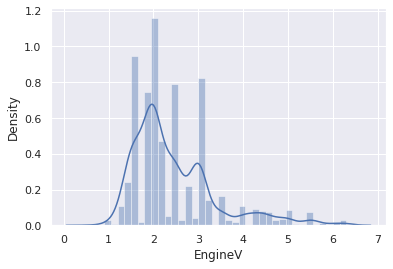

In [ ]:
data_3=data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


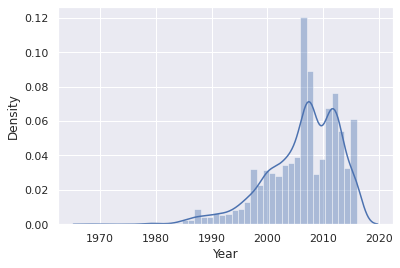

In [ ]:
#Feature Year
sns.distplot(data_3['Year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


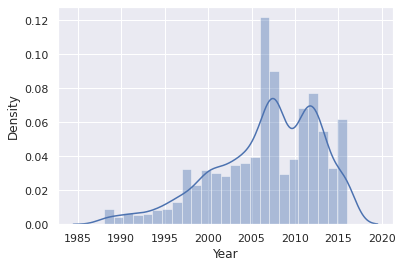

In [ ]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [ ]:
data_cleaned=data_4.reset_index()
data_cleaned.describe(include='all')

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867.000000,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,NaN,7,NaN,6,NaN,NaN,4,2,NaN
top,NaN,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,2172.327903,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,1257.285662,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,0.000000,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,1078.500000,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,2174.000000,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,3269.500000,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


#Checking for OLS Assumptions

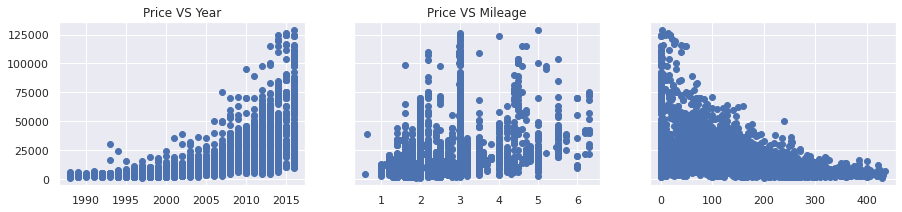

In [ ]:
# checking for Linearity
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price VS Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price VS EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.set_title('Price VS Mileage')
plt.show()

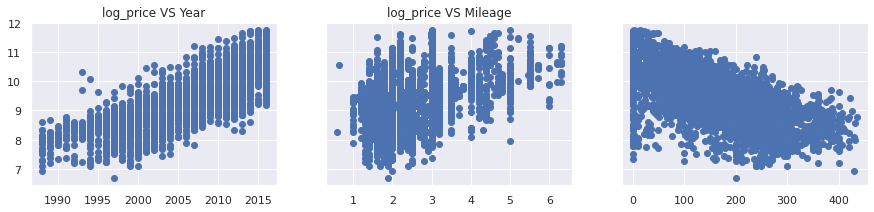

In [ ]:
# Relaxing assumption
data_cleaned['log_price']=np.log(data_cleaned['Price'])
f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price VS Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price VS EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax2.set_title('log_price VS Mileage')
plt.show()

## No enndogeneity
###No correlation between error term(SSE) and features. This will be checked at the end of the regression
## No Hetroscedasticity
### Means that error terms have equal variance (Fulfilled as log transformation has already been applied
## No Autocorrelation(no serail correlation)
### Not a time series data therefore fulfilled.


In [ ]:
# checking for multicollinearity(featues must not have high correlation)
variables=data_cleaned[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [ ]:
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


## VIF of 10.35 implies that year can be droped from the features this can also be varified using a heatmap

In [ ]:
data_cleaned_no_mc=data_cleaned.drop(['index','Price','Year'],axis=1)
data_cleaned_no_mc.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
count,3867,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN
mean,NaN,NaN,160.542539,2.450440,NaN,NaN,9.415703
std,NaN,NaN,95.633291,0.949366,NaN,NaN,0.876616
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


##Creating Dummies for the catagorical variables 

In [ ]:
data_with_dummy=pd.get_dummies(data_cleaned_no_mc,drop_first=True)
data_with_dummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
data_with_dummy.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
col=['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed=data_with_dummy[col]

# Linear Regression Model


In [ ]:
# defining target and input
target=data_preprocessed['log_price']
input=data_preprocessed.drop(['log_price'],axis=1)

In [ ]:
# Standerdizing or feature scaling
scaler=StandardScaler()
scaler.fit(input)
input_scaled=scaler.transform(input)

In [ ]:
# Spliting dataset into training and test
x_train,x_test,y_train,y_test=train_test_split(input_scaled,target,test_size=0.2,random_state=42)

In [ ]:
# Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
yhat=reg.predict(x_train)

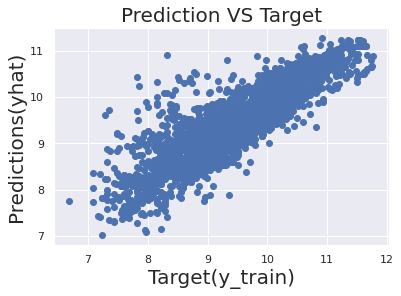

In [ ]:
plt.scatter(y_train,yhat)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

##Scatter plot must be as close to the 45 degree line from origin as possible for best predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


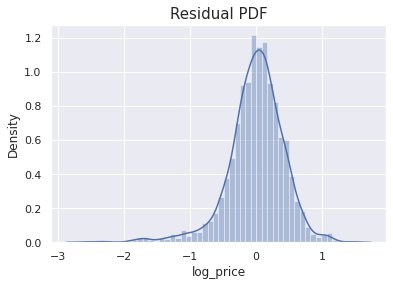

In [ ]:
# Other way to judge the model
sns.distplot(y_train-yhat)
plt.title('Residual PDF',fontsize=15)
plt.show()

## The distribution follows homoscadasticity

In [ ]:
# R-square to explain the variability our model id able to explain
reg.score(x_train,y_train)


0.7546487921881216

In [ ]:
summary=pd.DataFrame({'Features':input.columns.values,'Weight':reg.coef_})
summary

,Features,Weight
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


#***Wieghts Interpretation***
##***Continuous Variable***
### 1. A ***positive wieght*** shows that as the feature increases in values so does the Price and log_price variables.
### 2. A ***negative wieght*** shows that as the feature increases in values the Price and log_price variables decreses in values.

##***Dummy Variables***
### 1. A ***positive wieght*** shows that the respective catagory(e.g Brand) is more expensive than the benchmark(e.g Audi)
### 2. A ***positive wieght*** shows that the respective catagory(e.g Brand) is less expensive than the benchmark(e.g Audi)

#Testing

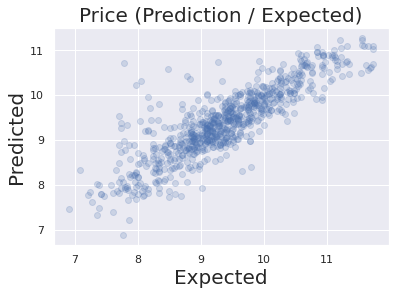

In [ ]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Price (Prediction / Expected)',fontsize=20)
plt.show()

In [ ]:
pf_df=pd.DataFrame({'Predictions':np.exp(yhat_test)})
pf_df.head()

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814


In [131]:
y_test=y_test.drop(['index'],axis=1)
y_test=y_test.reset_index(drop=True)
pf_df['Target(expected values)']=np.exp(y_test)

In [132]:
pf_df

,Predictions,Target(expected values)
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [138]:
pf_df['Residual']=pf_df['Target(expected values)']-pf_df['Predictions']
pf_df['Difference_percentage']=np.absolute(pf_df['Residual']/pf_df['Target(expected values)']*100)
pf_df.describe()

,Predictions,Target(expected values),Residual,Difference_percentage
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525
